In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = '/content/0131799991.csv'
data = pd.read_csv(file_path)

# Drop columns with too many missing values (threshold = 50% missing)
data_cleaned = data.dropna(axis=1, thresh=int(0.5 * len(data)))

# Drop any remaining rows with missing values
data_cleaned = data_cleaned.dropna()

# Normalize the numeric columns (excluding 'time' and 'cadenceno')
scaler = MinMaxScaler()
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop(['time', 'cadenceno'], errors='ignore')

data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

# Display cleaned and normalized dataset
print(data_cleaned.head())

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('/content/cleaned_tess_data.csv', index=False)
print("\nCleaned and normalized dataset saved to 'cleaned_tess_data.csv'")


            time      flux  flux_err  timecorr  cadenceno  centroid_col  \
338  1517.847352  0.054195  0.997072  0.971368     209080      0.507797   
339  1517.848741  0.083335  1.000000  0.971390     209081      0.505683   
340  1517.850130  0.080499  0.986552  0.971412     209082      0.496994   
341  1517.851519  0.067746  0.978062  0.971433     209083      0.503946   
342  1517.852908  0.075420  0.974297  0.971455     209084      0.528088   

     centroid_row  sap_flux  sap_flux_err   sap_bkg  sap_bkg_err  pdcsap_flux  \
338      0.133961  0.093222      0.997074  1.000000     1.000000     0.054195   
339      0.148050  0.124814      1.000000  0.984614     0.988433     0.083335   
340      0.119483  0.124944      0.986553  0.982086     0.983210     0.080499   
341      0.105550  0.106478      0.978063  0.970009     0.974139     0.067746   
342      0.184401  0.121557      0.974297  0.969468     0.976091     0.075420   

     pdcsap_flux_err  quality  mom_centr1  mom_centr1_err  mom

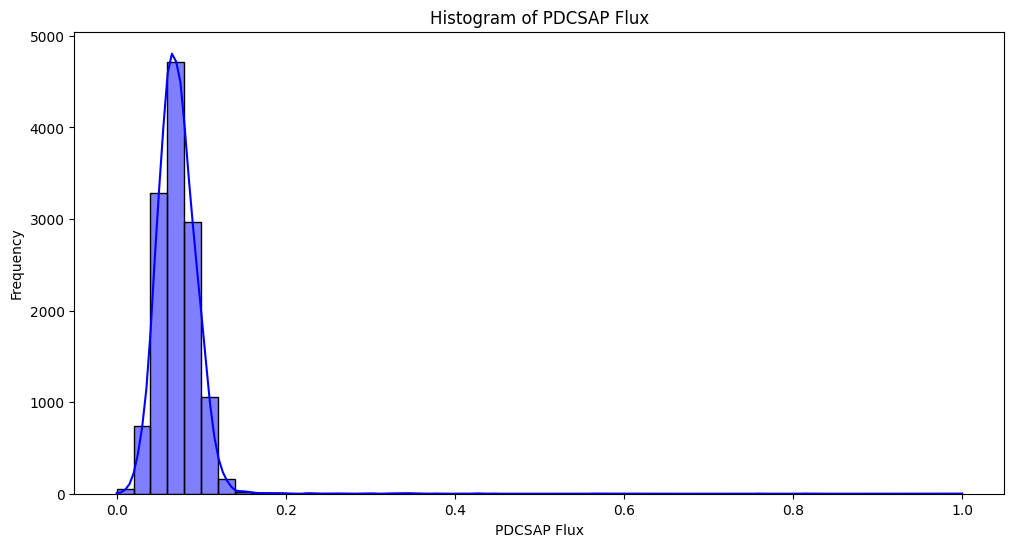

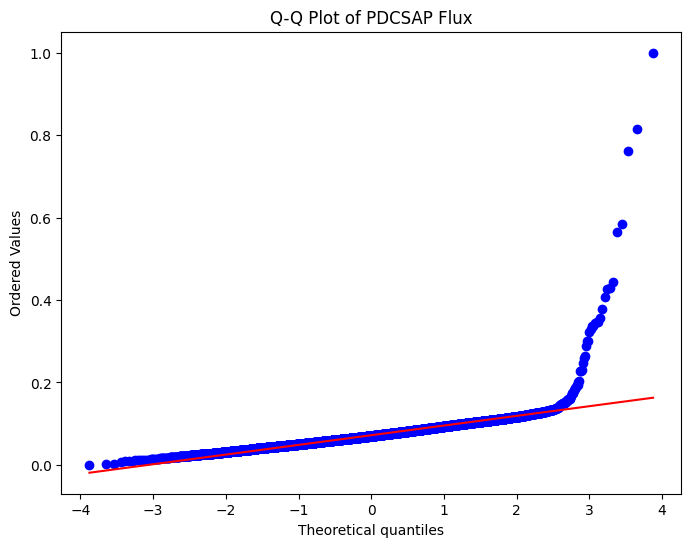

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the cleaned dataset
file_path = 'cleaned_tess_data.csv'
data_cleaned = pd.read_csv(file_path)

# Drop NaNs to avoid issues in plotting
data = data_cleaned['pdcsap_flux'].dropna()

# Generate Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data, bins=50, kde=True, color='blue')
plt.title('Histogram of PDCSAP Flux')
plt.xlabel('PDCSAP Flux')
plt.ylabel('Frequency')
plt.show()

# Generate Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot of PDCSAP Flux')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import anderson, jarque_bera, norm

# Load the cleaned dataset
file_path = 'cleaned_tess_data.csv'
data_cleaned = pd.read_csv(file_path)

# Drop NaNs to avoid issues in testing
data = data_cleaned['pdcsap_flux'].dropna()

# Anderson-Darling Test
print("=== Anderson-Darling Test ===")
result = anderson(data, dist='norm')
statistic = result.statistic

# Approximate p-value for Anderson-Darling
if statistic < 0.5:
    p_value = 1 - norm.cdf(statistic)
elif statistic < 1:
    p_value = 0.1 - 0.075 * (statistic - 0.5)
elif statistic < 1.5:
    p_value = 0.05 - 0.025 * (statistic - 1)
elif statistic < 2:
    p_value = 0.025 - 0.015 * (statistic - 1.5)
else:
    p_value = 0.001

print(f"Test Statistic: {statistic:.4f}")
print(f"Approximate p-value: {p_value:.4e}")
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

if statistic < result.critical_values[2]:  # 5% significance level
    print("Data appears to be Gaussian (Fail to reject null hypothesis).")
else:
    print("Data does NOT appear to be Gaussian (Reject null hypothesis).")

# Jarque-Bera Test
print("\n=== Jarque-Bera Test ===")
stat, p = jarque_bera(data)
print(f"Jarque-Bera Test: JB={stat:.4f}, p-value={p:.4e}")

if p > 0.05:
    print("Data appears to be Gaussian (Fail to reject null hypothesis).")
else:
    print("Data does NOT appear to be Gaussian (Reject null hypothesis).")

=== Anderson-Darling Test ===
Test Statistic: 209.8512
Approximate p-value: 1.0000e-03
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
Data does NOT appear to be Gaussian (Reject null hypothesis).

=== Jarque-Bera Test ===
Jarque-Bera Test: JB=21611389.6904, p-value=0.0000e+00
Data does NOT appear to be Gaussian (Reject null hypothesis).
